In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")
#engine = create_engine("sqlite:///resources/hawaii_measurement")
#engine = create_engine("sqlite:///resources/hawaii_station")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)


In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
# Calculate the date one year from the last date in data set
#station,name,latitude,longitude,elevation
#station,date,prcp,tobs
current_date=session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()

for date in current_date:
    split_current_date=date.split('-')
    
split_previous_date
current_year=int(split_current_date[0]); last_month=int(split_current_date[1]); last_day=int(split_current_date[2])

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_date = dt.date(last_year, last_month, last_day) - dt.timedelta(days=365)
print(query_date)

# Starting from the most recent data point in the database. 
  


# Perform a query to retrieve the data and precipitation scores
last_12months_prcp=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all() 


# Save the query results as a Pandas DataFrame and set the index to the date column
last_12months_prcp=pd.DataFrame(last_12months_prcp,columns=['date', 'prcp'])
last_12months_prcp.set_index('date', inplace=True)

# Sort the dataframe by date
last_12months_prcp.head()

# Use Pandas Plotting with Matplotlib to plot the data

print(last_12months_prcp)


2016-08-23
            prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23   NaN
2016-08-23  0.02
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2230 rows x 1 columns]


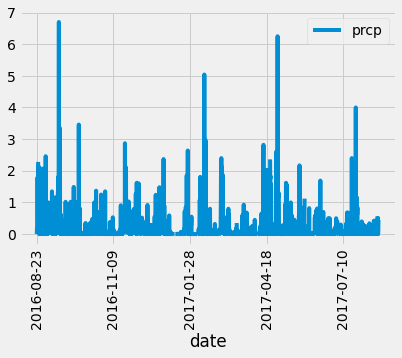

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12months_prcp.plot(rot=90)
plt.show()


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Measurement.station).group_by(Measurement.station).count()
print(total_stations)

9


In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
act_station=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).all()
print(act_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
       func.min(Measurement.tobs),
      func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]

low_high_avg_tmp=session.query(*sel).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).first()
print(low_high_avg_tmp)

('USC00519281', 54.0, 85.0, 71.66378066378067)


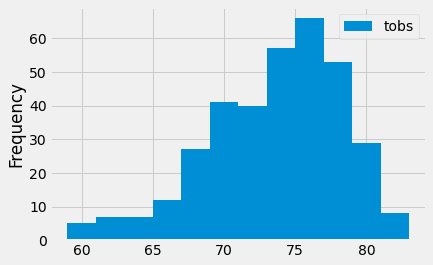

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station=low_high_avg_tmp[0]

last_12months_tobs_station=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station==top_station).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all()

top_station_tobs_last_12months=pd.DataFrame(last_12months_tobs_station,columns=['date','tobs'])

top_station_tobs_last_12months.plot.hist(bins=12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()

In [ ]:
#day3activity10andactivity4